# Project Estimate Improvement

<img src="Company logo.png">

#### Galactic Instruments is an engineering company dedicated to enabling space travel. They make various products that can be used in advanced spaceships. Each Team is aligned on the products they serve. The products are:

1. Warp Engines
2. Transporters
3. Tricorders
4. Universal Translators
5. Tractor Beams
6. Photon Torpedos

#### There are also 3 different deparentments (Parent Organizations) that server different functions. The departments are:

1. Systems Engineering: Technical branch for the sales team. They work with customers to prove the equipement can meet the customers needs before purchase.
2. Support Engineering: Assist customers in troubleshooting and ensuring they are successful after the sale.
3. R&D: Research and Development are focused on creating new products, but sometimes get involved in special projects for certain customers.

In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
#Bring in data
data = pd.read_csv('Project Estimates Scrubbed.csv', index_col='Date')
data.index = pd.to_datetime(data.index)
data['First_Estimate'] = pd.to_datetime(data['First_Estimate'])
data.sort_index(inplace=True)
data.head(5)

,First_Estimate,Days_between_estimate,EstimatedEffort,Total_Hours,Effort_over_Estimate,Parent_Team,Team_Name,Region
Date,,,,,,,,
2016-10-05,2016-10-11,6,20.0,12.5,62,Support Engineering,Tricorders,US & Canada
2016-10-05,2016-10-24,19,24.0,44.0,183,Systems Engineering,Warp Engines,US & Canada
2016-10-05,2016-11-28,54,60.0,57.5,95,Support Engineering,Warp Engines,US & Canada
2016-10-05,2016-10-11,6,7.0,5.0,71,Support Engineering,Transporters,US & Canada
2016-10-06,2016-10-19,13,24.0,2.0,8,Support Engineering,Warp Engines,US & Canada


In [6]:
#Create Bucket Functions
def days_bucket(days):
    output = ""
    if days == 0:
        output = "0"
    elif days == 1:
        output = "1"
    elif days == 2:
        output = "2"
    elif days == 3:
        output = "3"
    elif days == 4:
        output = "4"
    elif days == 5:
        output = "5"
    elif days == 6:
        output = "6"
    elif days == 7:
        output = "7"
    elif days > 7 and days <=20:
        output = "Between 7 & 20"
    elif days > 20 and days <=40:
        output = "Between 20 and 40"
    else:
        output = "Greater than 40"
    
    return output

def estimate_effort_bucket(ee):
    output = ''
    if ee < 80:
        output = "Less than 80"
    elif (ee >= 80 and ee < 120):
        output = "Between 80 and 120"
    elif (ee >= 120 and ee < 200):
        output = "Between 120 and 200"
    else:
        output = "Over 200"
    
    return output


def effort_bucket(effort):
    output = ''
    if effort <= 8:
        output = "Less than 8"
    elif (effort > 8 and effort < 20):
        output = "Between 8 and 20"
    elif (effort >= 20 and effort < 40):
        output = "Between 20 and 40"
    elif (effort >= 40 and effort < 80):
        output = "Between 40 and 80"
    else:
        output = "Over 80"
    
    return output

In [7]:
data['Days Bucket'] = data['Days_between_estimate'].apply(lambda x: days_bucket(x))
data['Estimate Effort Bucket'] = data['Effort_over_Estimate'].apply(lambda x: estimate_effort_bucket(x))
data['Effort Bucket'] = data['EstimatedEffort'].apply(lambda x: effort_bucket(x))

## Effort over Estimate Analysis

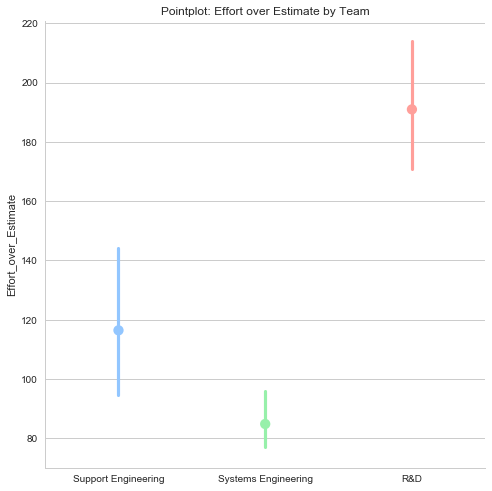

In [9]:
sns.set(style="whitegrid")
g = sns.factorplot(x="Parent_Team", y="Effort_over_Estimate",data=data, join=False, palette="pastel", kind="point",
                  size=7)
g.set_ylabels("Effort_over_Estimate")
g.set_xlabels("")
plt.title('Pointplot: Effort over Estimate by Parent Organization')
plt.show()

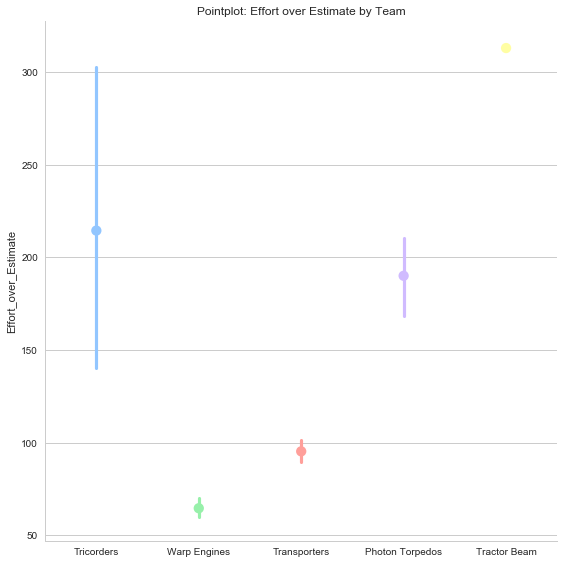

In [11]:
sns.set(style="whitegrid")
g = sns.factorplot(x="Team_Name", y="Effort_over_Estimate",data=data, join=False, palette="pastel", kind="point",
                  size=8)
#g = sns.pointplot(x="Parent_Team", y="Effort_over_Estimate",data=new_df, join=False, palette="pastel")
#g.despine(left=True)
g.set_ylabels("Effort_over_Estimate")
g.set_xlabels("")
plt.title('Pointplot: Effort over Estimate by Team')
plt.show()